In [2]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0a1782485364792c5f8273b16fe14758a56a93b2a738613d42bcb2596e201c32
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.9 MB/s eta 0:00:00


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
#from ydata_profiling import ProfileReport
from pandas_profiling import ProfileReport#import pandas_profiling

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2#import seaborn as sns

# Import libraries for Hypertuning
#import optuna
# Import libraries for gradient boosting
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier

# Suppress warnings
import warnings
#warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

## Data

In [72]:
data_train = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/test.csv")
original = pd.read_csv("/content/kindey stone urine analysis.csv")

data_train = data_train.drop(columns = ['id'])
data_test = data_test.drop(columns = ['id'])
data_train = pd.concat([data_train, original])

## EDA

In [21]:
ProfileReport(data_train,explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

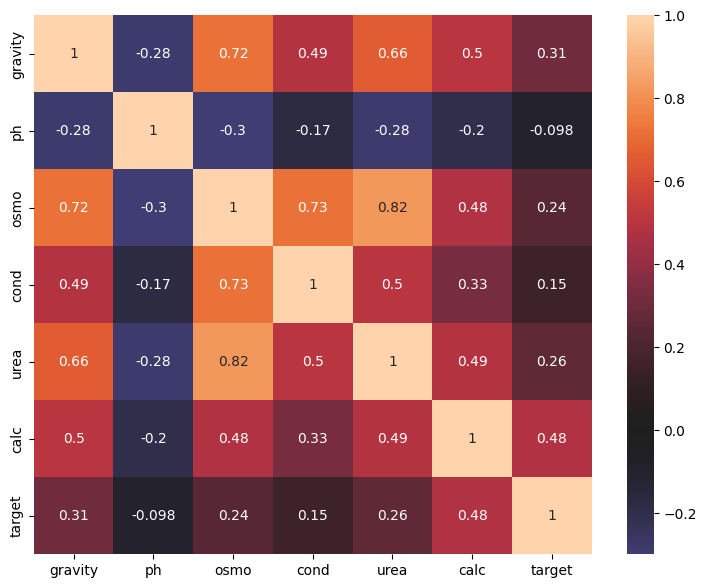

In [22]:
plt.figure(figsize=(9,7))
sns.heatmap(data_train.corr(method='pearson'),center=0, annot=True)
plt.show()

#data_train.describe()

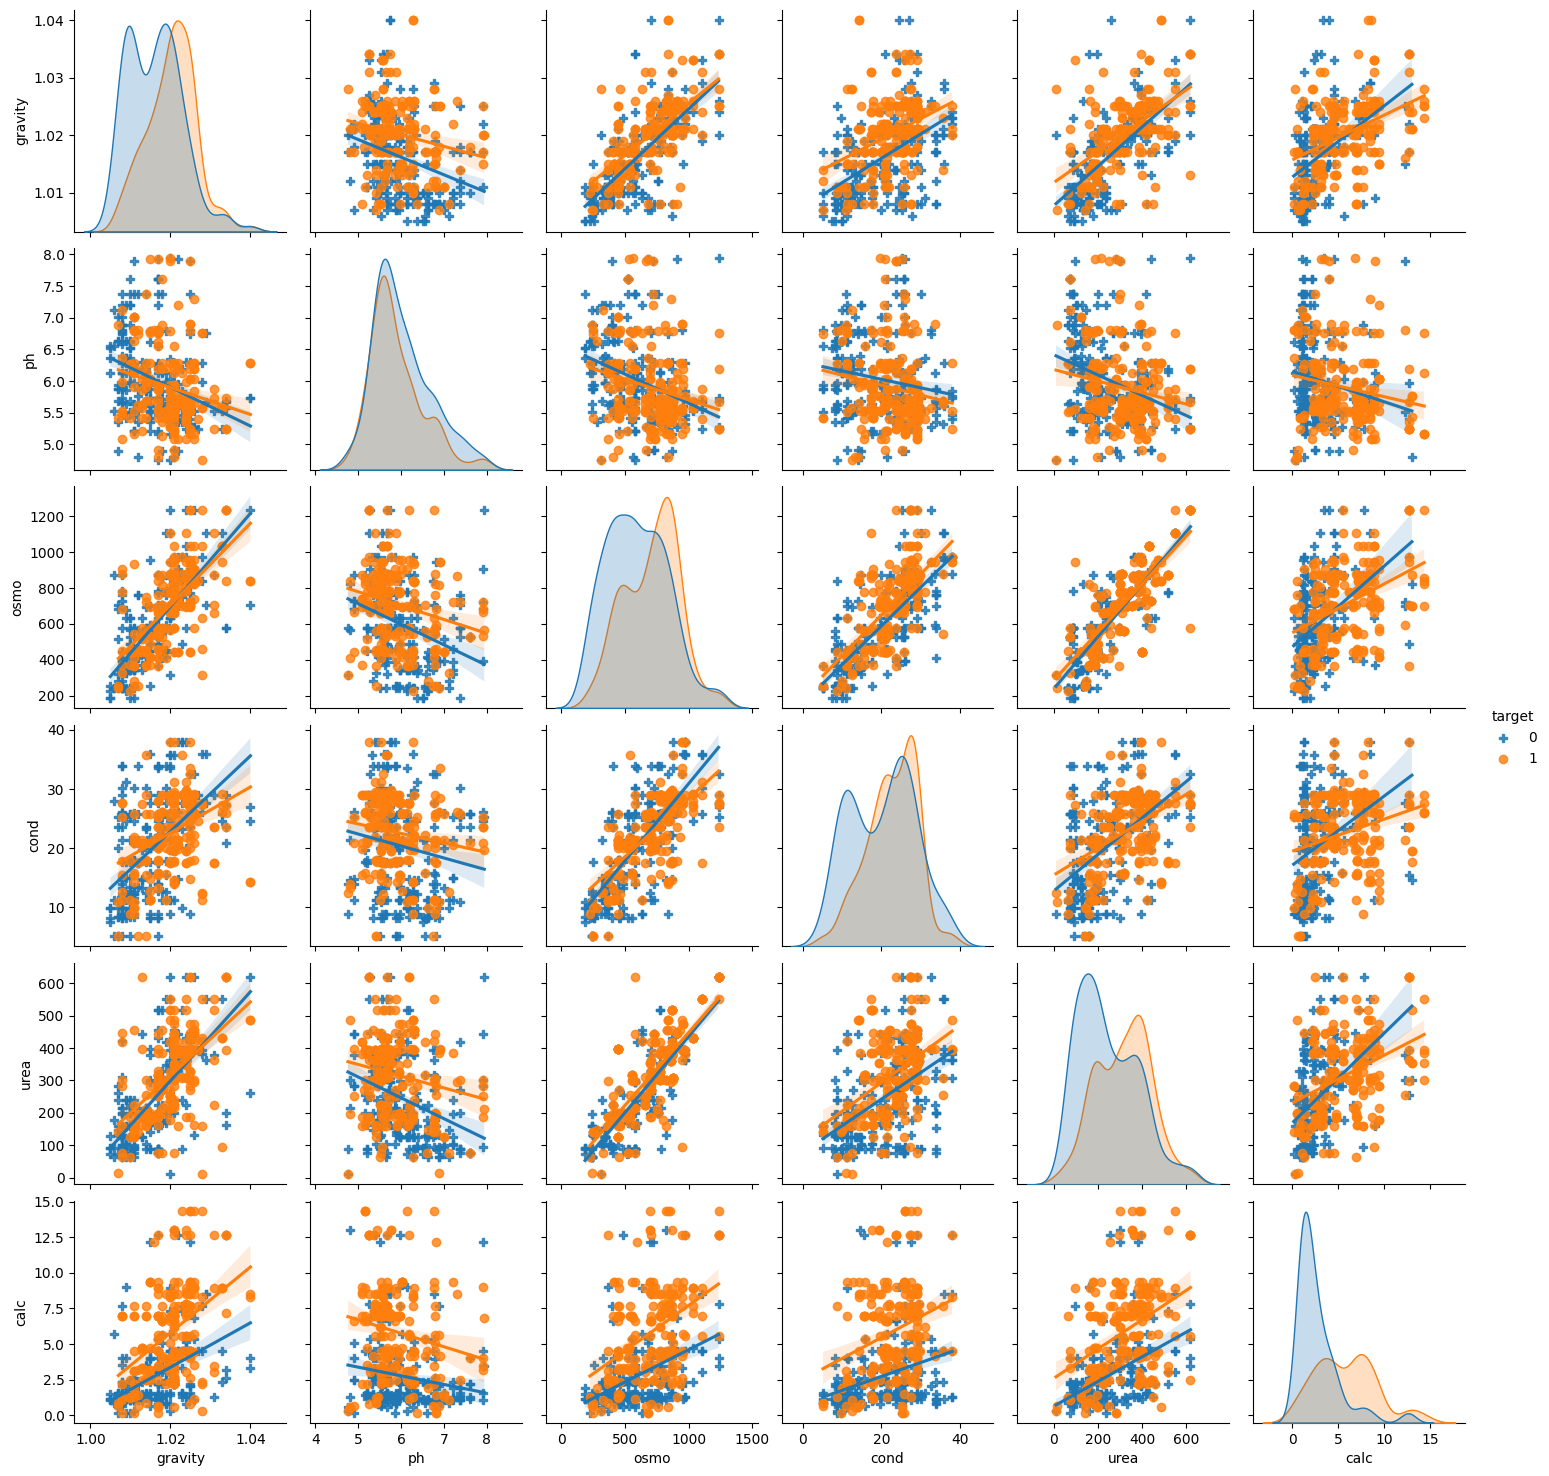

<Figure size 640x480 with 0 Axes>

In [23]:
sns.pairplot(data_train, kind="reg", hue="target", markers=['P','o'])
plt.figure()
plt.show()

## Pre-Processing

In [73]:
def outlier_removal(data, i):
    q1 = np.quantile(data[i] ,0.25)
    q3 = np.quantile(data[i] , 0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    data.drop(data[data[i]> upper_tail].index , inplace = True)
    data.drop(data[data[i]< lower_tail].index ,inplace =True)

#print(list(enumerate(data_train.columns)))#outlier_list = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
for  i ,outlier_list in enumerate(data_train.columns):
    outlier_removal(data_train ,outlier_list)


print(len(outlier_list)/len(data_train))

0.01282051282051282


In [74]:
#data marking? Separate the features and target variable
X = data_train.drop(columns = ['target'])
y = data_train['target']
#X_total = test


In [56]:
'''
#Normalizer().fit_transform(iris.data)
sc = StandardScaler()
# fit_transform()
X = sc.fit_transform(X)
#X_test = sc.fit_transform(X_test)
#data_train=pd.DataFrame(data_train)'''

'\n#Normalizer().fit_transform(iris.data)\nsc = StandardScaler()\n# fit_transform()\nX = sc.fit_transform(X)\n#X_test = sc.fit_transform(X_test)\n#data_train=pd.DataFrame(data_train)'

## Features

In [75]:
bestfeatures =SelectKBest(chi2, k='all')
Xchi2=bestfeatures.fit_transform(X, y)   #= bestfeatures.fit(X, y)
#dfscores =
#dfcolumns =
#bestfeatures.scores_
featureScores = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(bestfeatures.scores_)], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

X = X.drop(columns = ['ph'])

     Specs        Score
2     osmo  2685.343009
4     urea  2305.280189
5     calc   275.565855
3     cond    38.737592
1       ph     0.291568
0  gravity     0.002044


## Model：

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
log_model = LogisticRegression(max_iter=500, random_state=5)

log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]
print(log_model.score(X_test , y_test))

max_score=log_model.score(X_test , y_test)
best_model=log_model

0.6914893617021277


In [78]:
model= RandomForestClassifier(max_depth=25, min_samples_leaf=2, n_estimators=170,
                       n_jobs=-1,random_state=5)#max_depth=5,n_estimators=80,random_state=5
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.feature_importances_)
if model.score(X_test , y_test)>max_score :
    max_score=model.score(X_test , y_test)
    best_model=model
print("Accuracy：",model.score(X_test , y_test))
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

roc_auc=roc_auc_score(y_test, y_prob)
print(f'ROC AUC score: {roc_auc}')#0.7872340425531915 0.80625 ?0.7659574468085106 0.8078703703703705

[0.15555125 0.13804176 0.15792287 0.1472193  0.40126482]
Accuracy： 0.776595744680851
ROC AUC score: 0.8101851851851852


In [79]:
lgb_params = {
            'n_estimators':60,
            'max_depth': 7,
            'learning_rate': 0.05,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'metric': 'binary_error',
            'boosting_type': 'gbdt',
            'random_state': 5
        }
model =  LGBMClassifier(**lgb_params)
model.fit(X_train,y_train)
print(model.feature_importances_)#0.31，-0.098，0.24，0.15，0.26，0.48
if model.score(X_test , y_test)>max_score :
    max_score=model.score(X_test , y_test)
    best_model=model
print(model.score(X_test , y_test))
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

roc_auc=roc_auc_score(y_test, y_prob)
print(f'ROC AUC score: {roc_auc}')
#0.7446808510638298 0.7833333333333334

[147 138 152 113 189]
0.7446808510638298
ROC AUC score: 0.7833333333333334


In [80]:
xgb_params = {
            'n_estimators': 65,#,self.n_estimators
            'learning_rate': 0.05,#0.04 0.776595744680851
            'max_depth': 7,
            #'subsample': 0.6,
            #'colsample_bytree': 0.9,
            #'n_jobs': -1,
            #'eval_metric': 'logloss',
            'objective': 'binary:logistic',#二分类
            #'verbosity': 0,
            'random_state': 5,#self.random_state
    #'booster': 'gbtree',
    'gamma': 0,
    'lambda': 1,
    #'min_child_weight': 1,
    #'silent': 1,
    ##'eta': 0.007,
    'seed': 1000,
    #'nthread': 4,
    'grow_policy': 'depthwise',
    'eval_metric': 'auc'
        }

model = XGBClassifier(**xgb_params)
#best_model=model.best_estimator_
model.fit(X_train,y_train)
# feature importance
print(model.feature_importances_)#0.31，-0.098，0.24，0.15，0.26，0.48
if model.score(X_test , y_test)>max_score :
    max_score=model.score(X_test , y_test)
    best_model=model
print(model.score(X_test , y_test))
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

roc_auc=roc_auc_score(y_test, y_prob)
print(f'ROC AUC score: {roc_auc}')
#drop ph:0.7659574468085106 0.776595744680851
#        0.779861111111111

[0.12361659 0.13729644 0.15683024 0.142636   0.4396208 ]
0.7659574468085106
ROC AUC score: 0.779861111111111


## Optimizer&ensemble

In [46]:
'''classifier1 = catboost.CatBoostClassifier(**ct_best, verbose = 0)
classifier2 = lgb.LGBMClassifier(**lgb_best)
classifier3 = xgb.XGBClassifier(**xgb_best)
classifier4 = RandomForestClassifier()
classifier5 = CalibratedClassifierCV(classifier1, cv=KFold(n_splits=15))
classifier6 = CalibratedClassifierCV(classifier3, cv=KFold(n_splits=15))
classifier7 = catboost.CatBoostClassifier(verbose = 0)
classifier8 = AdaBoostClassifier()
classifier9 = KNeighborsClassifier()
classifier10 = GaussianProcessClassifier()'''

'classifier1 = catboost.CatBoostClassifier(**ct_best, verbose = 0)\nclassifier2 = lgb.LGBMClassifier(**lgb_best)\nclassifier3 = xgb.XGBClassifier(**xgb_best)\nclassifier4 = RandomForestClassifier()\nclassifier5 = CalibratedClassifierCV(classifier1, cv=KFold(n_splits=15))\nclassifier6 = CalibratedClassifierCV(classifier3, cv=KFold(n_splits=15))\nclassifier7 = catboost.CatBoostClassifier(verbose = 0)\nclassifier8 = AdaBoostClassifier()\nclassifier9 = KNeighborsClassifier()\nclassifier10 = GaussianProcessClassifier()'

## Visualizing Results

ROC AUC score: 0.8101851851851852
Confusion matrix:
[[45  9]
 [12 28]]
Accuracy： 0.776595744680851
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        54
           1       0.76      0.70      0.73        40

    accuracy                           0.78        94
   macro avg       0.77      0.77      0.77        94
weighted avg       0.78      0.78      0.78        94

mse 0.22340425531914893
rmse 0.4726565934366609
r2 0.24876412628316388


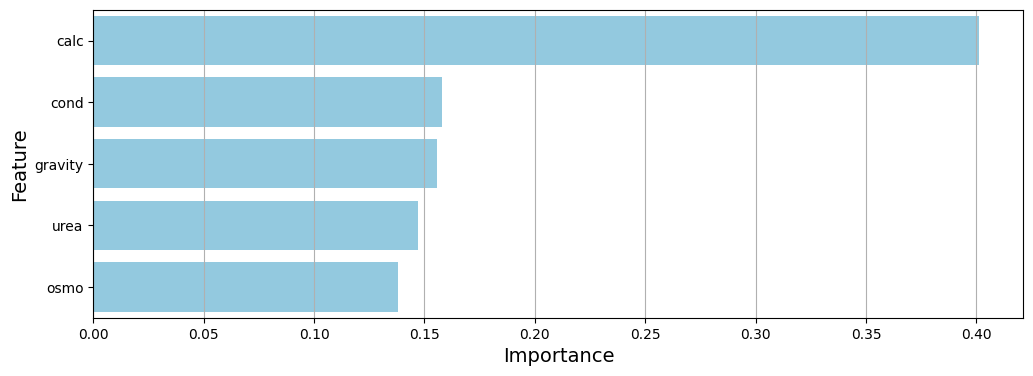

In [81]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_prob)
print(f'ROC AUC score: {roc_auc}')
print(f'Confusion matrix:\n{confusion}')

print("Accuracy：",best_model.score(X_test , y_test)) # print(f'Accuracy: {accuracy}')
print(classification_report(y_test,y_pred))
mse = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mse",mse)
print("rmse",rmse)
ssr = ((y_test - y_train.mean())**2).sum()
sst = ((y_train - y_train.mean())**2).sum()
r2 = ssr/sst
print("r2",r2)

feature_importance = pd.DataFrame()
_df = pd.DataFrame()
_df["importance"] = best_model.feature_importances_
_df["feature"] = X.columns
_df = _df.sort_values('importance', ascending=False)
_df = _df.head()
feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
feature_importance = feature_importance.sort_values('importance', ascending=False)
    # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
plt.figure(figsize=(12, 4))
sns.barplot(x='importance', y='feature', data=feature_importance, color='skyblue', errorbar='sd')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
    #plt.title(f'{title} Feature Importance [Top {top}]', fontsize=18)
plt.grid(True, axis='x')
plt.show()

## Submit

In [82]:
sub = pd.read_csv('/content/sample_submission.csv')
data_test = data_test.drop(columns = ['ph'])
pre = best_model.predict_proba(data_test)[:, 1]
sub.target = pre
#sub['target'] = y_prob
sub.to_csv('submission.csv', index=False)
sub

id    target
0    414  0.136625
1    415  0.422031
2    416  0.965490
3    417  0.285990
4    418  0.463165
..   ...       ...
271  685  0.721443
272  686  0.196092
273  687  0.493259
274  688  0.153625
275  689  0.236071

[276 rows x 2 columns]